<a href="https://colab.research.google.com/github/chrisli36/Homework-Classification/blob/main/cnn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from skimage import io, color
import os
import cv2
import pickle

import tensorflow as tf
from tensorflow.keras import layers, models
import keras

dim = 128

In [ ]:
# Function to load and preprocess images
def preprocess_image(image_path, target_size=(dim, dim)):
    image = io.imread(image_path)
    image = color.rgb2gray(image)  # Convert to grayscale
    return cv2.resize(image, target_size)

# Load and preprocess images from two classes
dataset_path = "../data/merged/hw"
path = "../data/merged/no_hw"
class_0_paths = [os.path.join(dataset_path, fn) for fn in os.listdir(dataset_path)]
class_1_paths = [os.path.join(path, fn) for fn in os.listdir(path)]
print("done finding paths")

class_0_data = np.array([preprocess_image(path) for path in class_0_paths])
class_1_data = np.array([preprocess_image(path) for path in class_1_paths[:600]])
print("done preprocessing")

# Create labels for the data
class_0_labels = np.zeros(class_0_data.shape[0])  # Label for class 0
class_1_labels = np.ones(class_1_data.shape[0])   # Label for class 1
print("done creating labels")

# Combine data and labels for both classes
X = np.concatenate((class_0_data, class_1_data), axis=0)
y = np.concatenate((class_0_labels, class_1_labels), axis=0)
print("done combining")

pickle.dump(X, open('processed_imgs/X_data_{}.pkl'.format(dim), 'wb'))
pickle.dump(y, open('processed_imgs/y_data_{}.pkl'.format(dim), 'wb'))

In [6]:
X = pickle.load(open('processed_imgs/X_data_{}.pkl'.format(dim), 'rb'))
y = pickle.load(open('processed_imgs/y_data_{}.pkl'.format(dim), 'rb'))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Epoch 1/10


/Users/christopherli/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.5822 - loss: 0.7363 - val_accuracy: 0.7459 - val_loss: 0.5988
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7672 - loss: 0.5158 - val_accuracy: 0.7951 - val_loss: 0.4877
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8258 - loss: 0.4219 - val_accuracy: 0.8115 - val_loss: 0.4253
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8620 - loss: 0.3478 - val_accuracy: 0.8770 - val_loss: 0.2977
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8750 - loss: 0.2827 - val_accuracy: 0.9180 - val_loss: 0.1816
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9248 - loss: 0.1830 - val_accuracy: 0.9180 - val_loss: 0.1652
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9546 - loss: 0.1118 - val_accuracy: 0.9344 - val_loss: 0.1507
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9298 - loss: 0.1319 - val_accuracy: 0.9754 - val_

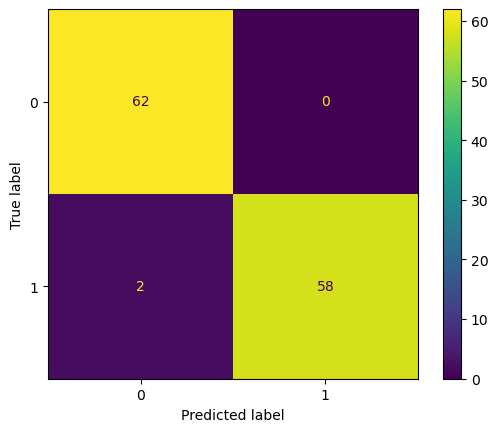

In [20]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# evaluate on validation data
predictions = (model.predict(X_val) > 0.5).astype(int)

cm = confusion_matrix(y_val, predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

model.save('cnn_classifier_{}.keras'.format(dim))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9828 - loss: 0.0332
Test accuracy: 0.9752066135406494
Test loss:  0.04047290235757828
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        66
         1.0       0.98      0.96      0.97        55

    accuracy                           0.98       121
   macro avg       0.98      0.97      0.97       121
weighted avg       0.98      0.98      0.98       121

Accuracy: 0.9752066115702479


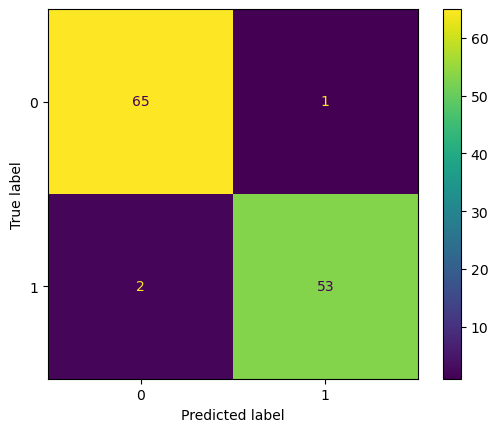

In [21]:
model = keras.models.load_model('cnn_classifier_{}.keras'.format(dim))

# Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print("Test accuracy:", acc)
print("Test loss: ", loss)

# Make predictions
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, predicted_labels))

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 64)       